# Clasificación con Red Neuronal Profunda - Ejemplo

En este ejemplo se aplicará una red neuronal profunda en [TensorFlow](https://www.tensorflow.org/) (en particular, [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/)) para clasificar las prendas de vestir del set datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" alt="Fashion-MNIST sample" width="600"/>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow import keras

In [2]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

In [3]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

## Preprocesamiento de datos

Obtengamos las caracterísitcas y las etiquetas desde [OpenML](https://www.openml.org/d/40996):

In [5]:
X, y = fetch_openml(
    'Fashion-MNIST',
    version='active',
    return_X_y=True,
    as_frame=False
)

In [6]:
# Las etiquetas están almacenadas como texto. Convirtámoslas en numéricas:
y = y.astype('int8')

In [7]:
# Definamos un diccionario que mapee las etiquetas numéricas a los tipos de
# prenda de vestir que representan:
classes = {
    0: 'camiseta',
    1: 'pantalón',
    2: 'suéter',
    3: 'vestido',
    4: 'chaqueta',
    5: 'sandalia',
    6: 'camisa',
    7: 'zapatilla',
    8: 'bolso', 
    9: 'bota'
}

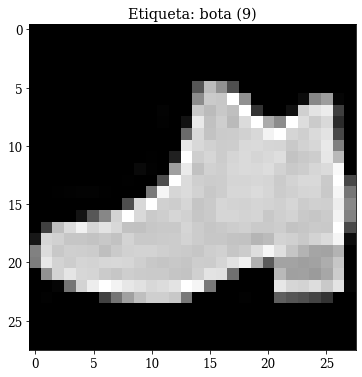

In [18]:
# Probemos diferentes valores de `image_index` para visualizar algunas imágenes
# del set de datos:
image_index = 15

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(X[image_index].reshape(28, 28), cmap='gray')
label = y[image_index]
ax.set_title('Etiqueta: {0} ({1})'.format(classes[label], label));

In [9]:
# Separemos los datos en 50,000 muestras de entrenamiento, 10,000 de validación
# y 10,000 de evaluación:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=20000, stratify=y, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=10000, stratify=y_val, random_state=random_state
)

# Normalicemos las caracterísitcas (los pixeles de 8 bits de profundidad tomas
# valores entre 0 y 255):
X_train /= 255
X_val /= 255
X_test /= 255

## Clasificación

In [137]:
# Definamos un modelo secuencial de Keras:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='tanh', kernel_regularizer=keras.regularizers.l2(0.000)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.002)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01)),
])

In [138]:
# Veamos la descripción del modelo:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_94 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_95 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_96 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_97 (Dense)             (None, 10)                330       
Total params: 115,306
Trainable params: 115,306
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compilemos el modelo con una función de pérdida, un optimizador y la accuracy
# como una métrica a seguir:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [140]:
%%time
# Entrenemos el modelo:
model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
49/49 [==============================] - 0s 8ms/step - loss: 1.5182 - accuracy: 0.6679 - val_loss: 1.1171 - val_accuracy: 0.7725
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 1.0191 - accuracy: 0.8030 - val_loss: 0.9588 - val_accuracy: 0.8199
Epoch 3/50
49/49 [==============================] - 0s 5ms/step - loss: 0.9103 - accuracy: 0.8339 - val_loss: 0.8901 - val_accuracy: 0.8355
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.8511 - accuracy: 0.8461 - val_loss: 0.8386 - val_accuracy: 0.8479
Epoch 5/50
49/49 [==============================] - 0s 5ms/step - loss: 0.8057 - accuracy: 0.8562 - val_loss: 0.8010 - val_accuracy: 0.8558
Epoch 6/50
49/49 [==============================] - 0s 5ms/step - loss: 0.7728 - accuracy: 0.8615 - val_loss: 0.7736 - val_accuracy: 0.8587
Epoch 7/50
49/49 [==============================] - 0s 5ms/step - loss: 0.7430 - accuracy: 0.8665 - val_loss: 0.7516 - val_accuracy: 0.8621
Epoch 8/50
49/49 [==

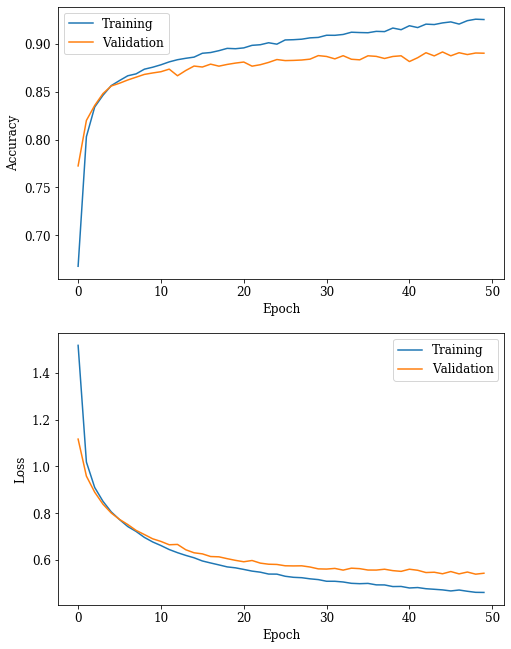

In [141]:
# Grafiquemos la pérdida y la accuracy de entrenamiento y validación a lo largo
# de las épocas de entrenamiento:

history = model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[0].plot(history['accuracy'])
ax[0].plot(history['val_accuracy'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'])
ax[1].plot(history['val_loss'])
ax[1].legend(['Training', 'Validation']);

In [142]:
# Hallemos la pérdida y la accuracy para el conjunto de prueba:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 479us/step - loss: 0.5441 - accuracy: 0.8901


[0.5440959930419922, 0.8901000022888184]

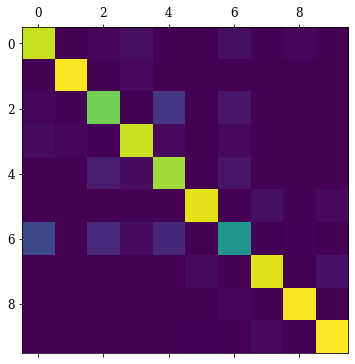

In [107]:
# Grafiquemos la matriz de confusión para el conjunto de prueba:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1)));

## Red Neuronal Convolucional (Extra)

Se recomienda correr el siguiente código en Google Colaboratory con la aceleración con GPU activada.

In [151]:
conv_model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='tanh'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(1e-5)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(1e-4))
])

In [152]:
conv_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_102 (Dense)            (None, 64)                173120    
_________________________________________________________________
dense_103 (Dense)            (None, 10)                650       
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
_________________________________________________________________


In [153]:
conv_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [154]:
%%time
conv_model.fit(
    X_train.reshape(-1, 28, 28, 1),
    y_train,
    batch_size=512,
    epochs=50,
    validation_data=(X_val.reshape(-1, 28, 28, 1), y_val)
)

Epoch 1/50
98/98 [==============================] - 3s 33ms/step - loss: 0.7321 - accuracy: 0.7624 - val_loss: 0.4945 - val_accuracy: 0.8313
Epoch 2/50
98/98 [==============================] - 3s 33ms/step - loss: 0.4498 - accuracy: 0.8432 - val_loss: 0.4333 - val_accuracy: 0.8484
Epoch 3/50
98/98 [==============================] - 3s 34ms/step - loss: 0.3963 - accuracy: 0.8626 - val_loss: 0.3898 - val_accuracy: 0.8644
Epoch 4/50
98/98 [==============================] - 3s 34ms/step - loss: 0.3651 - accuracy: 0.8720 - val_loss: 0.3663 - val_accuracy: 0.8744
Epoch 5/50
98/98 [==============================] - 3s 32ms/step - loss: 0.3409 - accuracy: 0.8816 - val_loss: 0.3511 - val_accuracy: 0.8772
Epoch 6/50
98/98 [==============================] - 3s 33ms/step - loss: 0.3319 - accuracy: 0.8837 - val_loss: 0.3427 - val_accuracy: 0.8807
Epoch 7/50
98/98 [==============================] - 3s 33ms/step - loss: 0.3132 - accuracy: 0.8908 - val_loss: 0.3315 - val_accuracy: 0.8874
Epoch 8/50
98

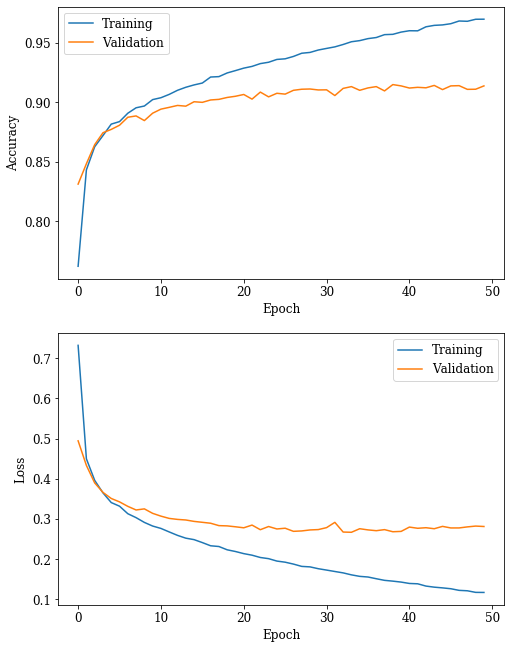

In [155]:
history = conv_model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[0].plot(history['accuracy'])
ax[0].plot(history['val_accuracy'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'])
ax[1].plot(history['val_loss'])
ax[1].legend(['Training', 'Validation']);

In [156]:
conv_model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9078


[0.28228455781936646, 0.907800018787384]

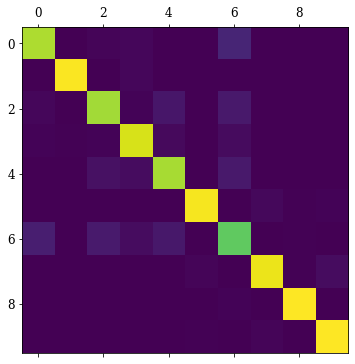

In [157]:
# Grafiquemos la matriz de confusión para el conjunto de prueba:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix(
    y_test,
    np.argmax(conv_model.predict(X_test.reshape(-1, 28, 28, 1)), axis=-1)
));